Data Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
airbnb = pd.read_csv("data/airbnb.csv")

In [5]:
airbnb.shape

(13232, 9)

There are no duplicates to be removed.

In [8]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airbnb)

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [9]:
airbnb.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13222.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284677,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123236,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


Remove the outliers

In [11]:
price_min = airbnb.price.mean() - 3 * airbnb.price.std()
price_max = airbnb.price.mean() + 3 * airbnb.reviews.std()
print(price_min, price_max)

reviews_min = airbnb.reviews.mean() - 3*airbnb.reviews.std()
reviews_max = airbnb.reviews.mean() + 3*airbnb.reviews.std()
print(reviews_min, reviews_max)

-90.35624315205116 178.6388918039557
-75.18465848362794 125.91552075440438


In [23]:
airbnb = airbnb[
    (np.abs(stats.zscore(airbnb.reviews)) < 3)  & \
    (np.abs(stats.zscore(airbnb.price)) < 3)
]

outliers_col(airbnb)
airbnb.shape

room_id | 0 | int64
host_id | 0 | int64
reviews | 21 | int64
overall_satisfaction | 0 | float64
accommodates | 168 | int64
bedrooms | 89 | float64
price | 0 | float64


/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


(10952, 9)

In [36]:
airbnb = airbnb[
    (np.abs(stats.zscore(airbnb.reviews)) < 3)  & \
    (np.abs(stats.zscore(airbnb.price)) < 3)
]

outliers_col(airbnb)
airbnb.shape

room_id | 0 | int64
host_id | 0 | int64
reviews | 0 | int64
overall_satisfaction | 0 | float64
accommodates | 0 | int64
bedrooms | 0 | float64
price | 0 | float64


/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


(10288, 9)

In [37]:
airbnb = airbnb[
    (np.abs(stats.zscore(airbnb.bedrooms)) < 3)  & \
    (np.abs(stats.zscore(airbnb.accommodates)) < 3)
]

outliers_col(airbnb)
airbnb.shape

room_id | 0 | int64
host_id | 0 | int64
reviews | 0 | int64
overall_satisfaction | 0 | float64
accommodates | 0 | int64
bedrooms | 0 | float64
price | 0 | float64


/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


(10288, 9)

Missing Values

In [39]:
n_records = len(airbnb)
def missing_values_col(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_col(airbnb)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0006804043545878694 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


In [42]:
airbnb_no_null = airbnb.dropna(subset=["overall_satisfaction"])
airbnb_no_null.shape

(10281, 9)

In [45]:
airbnb["overall_satisfaction"] = airbnb.overall_satisfaction.fillna(0)

airbnb.shape

(10288, 9)

In [47]:
satisfaction_median = airbnb.overall_satisfaction.median()

airbnb.overall_satisfaction = airbnb.overall_satisfaction.fillna(satisfaction_median)

In [50]:
airbnb[airbnb.overall_satisfaction==satisfaction_median]

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0
12,34977,146695,Entire home/apt,Santa Maria Maior,54,4.5,6,2.0,60.0
14,42172,184400,Entire home/apt,Santa Maria Maior,45,4.5,6,2.0,138.0
18,47717,217058,Entire home/apt,Santa Maria Maior,70,4.5,3,1.0,57.0
19,50108,229376,Entire home/apt,Estrela,33,4.5,4,1.0,69.0
22,57850,276092,Entire home/apt,Estrela,52,4.5,3,2.0,70.0
23,59227,184400,Entire home/apt,Misericórdia,25,4.5,7,3.0,138.0
27,73764,154341,Entire home/apt,Santo António,18,4.5,2,1.0,64.0
28,75171,184400,Entire home/apt,Estrela,19,4.5,5,2.0,115.0


In [48]:
from scipy import stats

Normalization

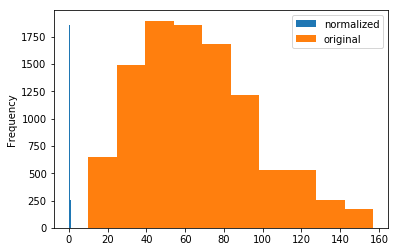

In [51]:
price_x_min = airbnb.price.min()
price_x_max = airbnb.price.max()

price_original = airbnb.price
price_normalized = price_original.apply(
    lambda x: (x-price_x_min) / (price_x_max - price_x_min))

price_normalized.plot.hist(label="normalized")
price_original.plot.hist(label="original")
plt.legend();

The prices with no outliers and when normalized is very dense and narrow, shwoing that the several prices in the IQR are in a very small range 

Standardization

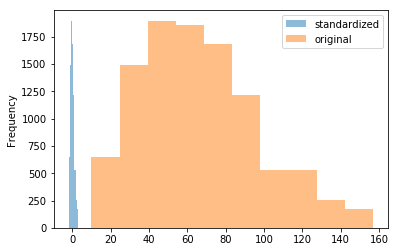

In [53]:
price_mu = airbnb.price.mean()
price_sigma = airbnb.price.std()

price_standardized = price_original.apply(lambda x: (x-price_mu) / price_sigma)

price_standardized.plot.hist(label="standardized", alpha=0.5)
price_original.plot.hist(label="original", alpha=0.5)
plt.legend();